In [1]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
%matplotlib notebook
import scipy.stats as stats

In [2]:
data = pd.read_csv("C:/Users/Cami/Documents/Python scripts/contenidos_innovacion.csv", encoding="latin-1", sep=";")

In [3]:
data.head()

,Unnamed: 0,categoria,Titulo,fecha,link,auxcnt,unlist(visitas)
0,1,Empresa,Puerto de Valparaíso actualiza sistema Silogpo...,2017-04-29,http://www.innovacion.cl/2017/04/puerto-de-val...,/2017/04/puerto-de-valparaiso-actualiza-sistem...,10
1,2,Empresa,"Directorio de Acti recibe seis nuevos socios, ...",2017-04-28,http://www.innovacion.cl/2017/04/directorio-de...,/2017/04/directorio-de-acti-recibe-seis-nuevos...,10
2,3,Empresa,Una oportunidad efectiva para que la mujer con...,2017-04-24,http://www.innovacion.cl/columna/una-oportunid...,/columna/una-oportunidad-efectiva-para-que-la-...,65
3,4,Empresa,¿Siempre se puede innovar en las empresas?,2017-04-23,http://www.innovacion.cl/2017/04/siempre-se-pu...,/2017/04/siempre-se-puede-innovar-en-las-empre...,10
4,5,Empresa,Cuatro claves para que las Pymes aprendan a ev...,2017-04-21,http://www.innovacion.cl/2017/04/cuatro-claves...,/2017/04/cuatro-claves-para-que-las-pymes-apre...,10


In [5]:
data['categoria'].value_counts()

Emprendimiento         1775
Tecnología             1003
Ciencia y educación     977
Empresa                 892
Economia y politica     756
Cultura y diseño        736
Name: categoria, dtype: int64

<IPython.core.display.Javascript object>


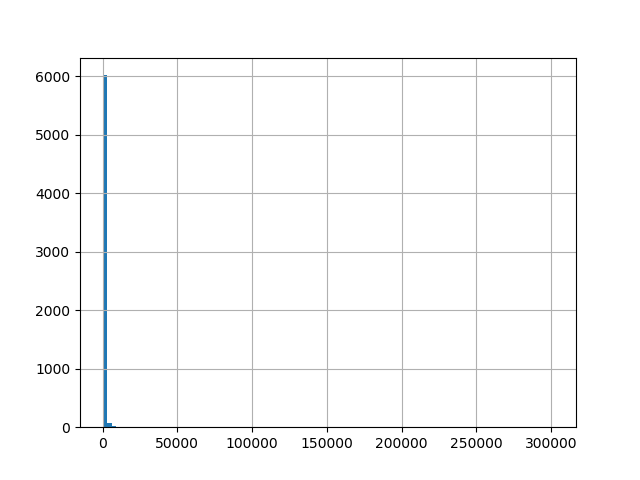

In [14]:
data['unlist(visitas)'].hist(bins=100)

In [5]:
data[['categoria','unlist(visitas)']].groupby('categoria').mean()

,unlist(visitas)
categoria,
Ciencia y educación,175.439099
Cultura y diseño,432.055707
Economia y politica,185.781746
Emprendimiento,740.371831
Empresa,1001.669283
Tecnología,527.012961


In [6]:
val = stats.f_oneway(data[data['categoria']=='Emprendimiento']['unlist(visitas)'],
                              data[data['categoria']=='Empresa']['unlist(visitas)'], 
                              data[data['categoria']=='Cultura y diseño'.decode('utf-8')]['unlist(visitas)'],
                              data[data['categoria']=='Economia y politica']['unlist(visitas)'],
                              data[data['categoria']=='Ciencia y educación'.decode('utf-8')]['unlist(visitas)'],
                              data[data['categoria']=='Tecnología'.decode('utf-8')]['unlist(visitas)'])                          

In [7]:
print(val)

F_onewayResult(statistic=3.3292171731382583, pvalue=0.0052629928482329693)


In [8]:
df = data[['Titulo', 'unlist(visitas)']].copy()
df.dropna(inplace=True)

### Cross Validation

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics

count = CountVectorizer(min_df=5, ngram_range = (1,3)).fit(df['Titulo'])
x_train_vectorizedCV = count.transform(df['Titulo'])

model = LinearRegression()
print(cross_val_score(model, x_train_vectorizedCV, df['unlist(visitas)'],cv = 10))

[ -2.50484939e+01  -1.21110484e+02  -5.37697964e+01  -2.28206240e+02
  -3.38769171e+00  -5.63654743e+00  -1.86780392e+00  -2.94408388e+00
  -6.78524471e+01   6.04841516e-02]


### vectorización

In [29]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df['Titulo'],df['unlist(visitas)'], random_state=0)

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline

vect = TfidfVectorizer(min_df=5, ngram_range = (1,3)).fit(x_train)
x_train_tfivectorized = vect.transform(x_train)

count = CountVectorizer(min_df=5, ngram_range = (1,3)).fit(x_train)
x_train_vectorized = count.transform(x_train)

SVD = TruncatedSVD()
TT = Normalizer(copy=False)
lsa = make_pipeline(SVD, TT)

X = lsa.fit_transform(x_train_tfivectorized)
len(count.get_feature_names())

2306

In [47]:
#from gensim.models.lsimodel import LsiModel

#LsiModel(x_train_vectorized)
len(X)

4611

### Modelado

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

model = LinearRegression().fit(X, y_train)
model_test = model.predict(count.transform(x_test))


print(metrics.r2_score(y_test, model_test))

ValueError: dimension mismatch

In [23]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics



tree = KNeighborsRegressor(n_neighbors=3).fit(x_train_vectorized, y_train)
tree_test = tree.predict(count.transform(x_test))


print(metrics.r2_score(y_test, tree_test))

-0.0806667813166


In [20]:
from adspy_shared_utilities import plot_decision_tree
plot_decision_tree(tree, CountVectorizer(min_df=5, ngram_range = (1,3)).fit(df['Titulo']),data['unlist(visitas)'])

TypeError: object of type 'CountVectorizer' has no len()

In [107]:
model.predict(vect.transform(['Cómo las startups en salud pueden apoyar a la organización hospitalaria']))

array([ 537.80199523])

In [108]:
model.predict(vect.transform(['La necesidad de una ley de transferencia tecnológica']))

array([ 537.80199523])

In [109]:
model.predict(vect.transform(['El pensamiento innovador']))

array([ 537.80199523])

In [110]:
model.predict(vect.transform(['capital para nuevos innovación: semilla y abeja']))

array([ 537.80199523])